In [1]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

import pandas as pd
import numpy as np

import src.randgg
from src.randgg.algorithm import compute_closest_intersections,compute_regressions,print_best_p,compute_best_p
from src.randgg.plot import plot_curve, plot_regressions

In [2]:
nb_samples = 10000

In [3]:
df = pd.read_csv("cyclic_directed_%d.csv" % (nb_samples),sep=',')
df['p'] = df['p'].apply(lambda x : float(x.replace(',','.')) if type(x) is str else x).values
df.head()

,p,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001,0,1,1,2,1,4,10,7,12,...,13,17,22,18,33,31,28,47,59,61
2,0.002,0,1,2,12,14,19,29,39,49,...,65,68,106,101,140,136,147,179,209,231
3,0.003,0,7,11,17,35,44,41,76,84,...,146,168,211,229,294,292,364,391,494,538
4,0.004,2,7,17,44,49,67,90,115,177,...,275,298,411,480,515,637,734,805,925,1033


<Figure size 432x288 with 0 Axes>

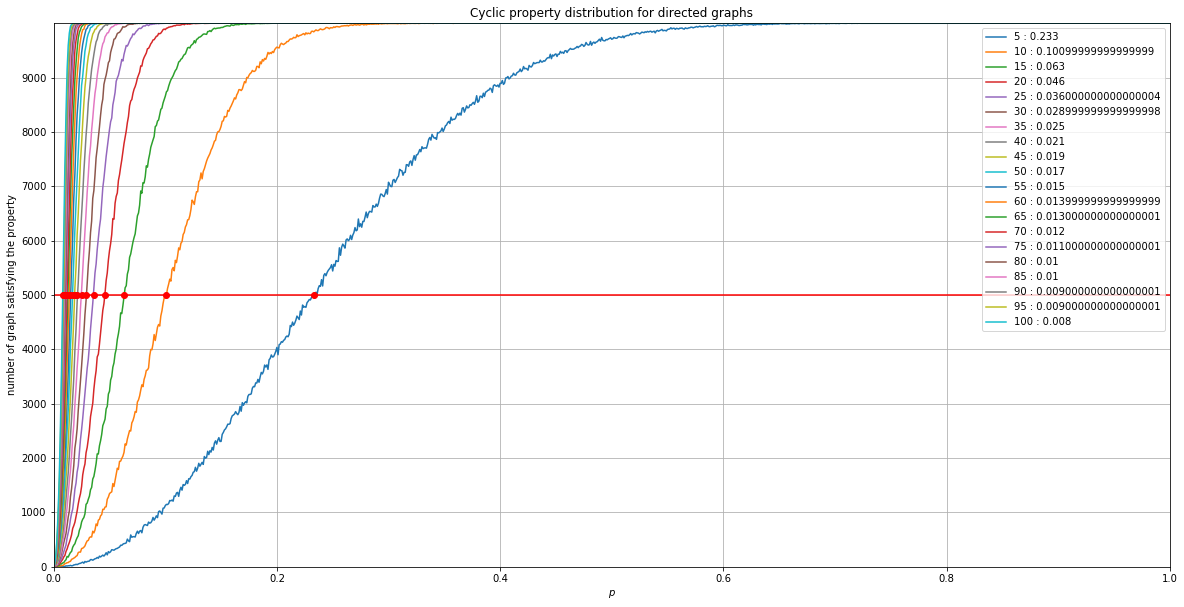

In [4]:
plot_curve(df,nb_samples,'Cyclic property distribution for directed graphs')

<Figure size 432x288 with 0 Axes>

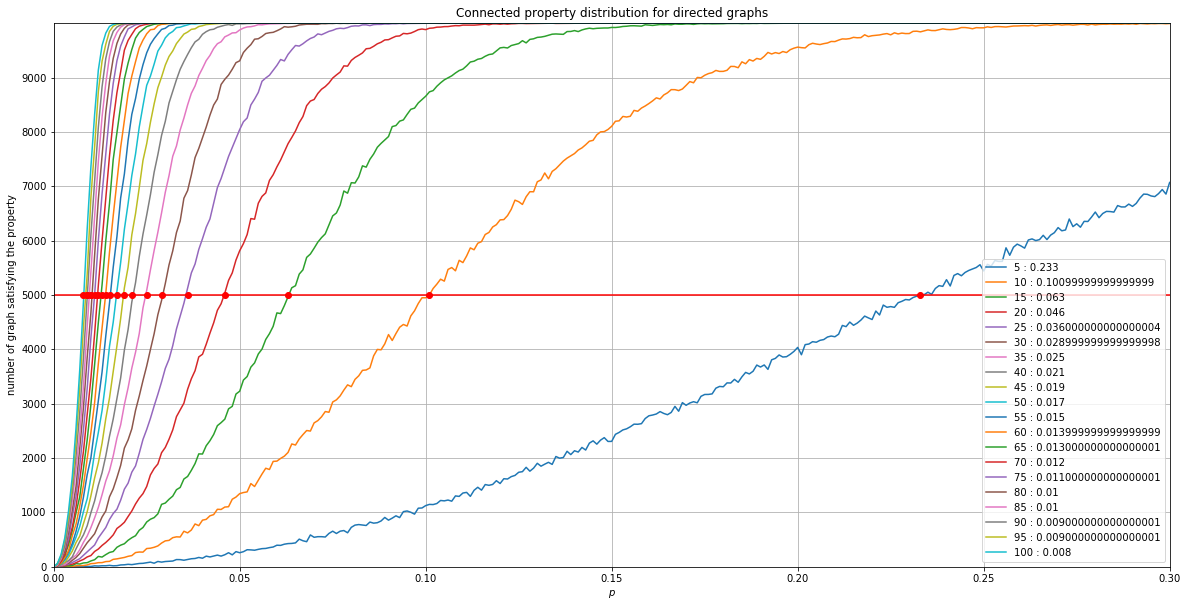

In [5]:
plot_curve(df,nb_samples,'Connected property distribution for directed graphs',xlim=(0.0,0.30))

In [6]:
print_best_p(df,nb_samples,max_degree=16)

Best p for 5 vertices : 0.231930, regression error : 27.049315
Best p for 10 vertices : 0.100901, regression error : 17.458519
Best p for 15 vertices : 0.063078, regression error : 24.953551
Best p for 20 vertices : 0.044786, regression error : 64.681100
Best p for 25 vertices : 0.034615, regression error : 69.586333
Best p for 30 vertices : 0.028627, regression error : 93.692370
Best p for 35 vertices : 0.024202, regression error : 137.225870
Best p for 40 vertices : 0.020659, regression error : 173.012002
Best p for 45 vertices : 0.017625, regression error : 194.803625
Best p for 50 vertices : 0.015296, regression error : 202.952258
Best p for 55 vertices : 0.013427, regression error : 205.282360
Best p for 60 vertices : 0.012048, regression error : 203.954434
Best p for 65 vertices : 0.010935, regression error : 198.410017
Best p for 70 vertices : 0.010117, regression error : 194.728035
Best p for 75 vertices : 0.009381, regression error : 189.288394
Best p for 80 vertices : 0.00882

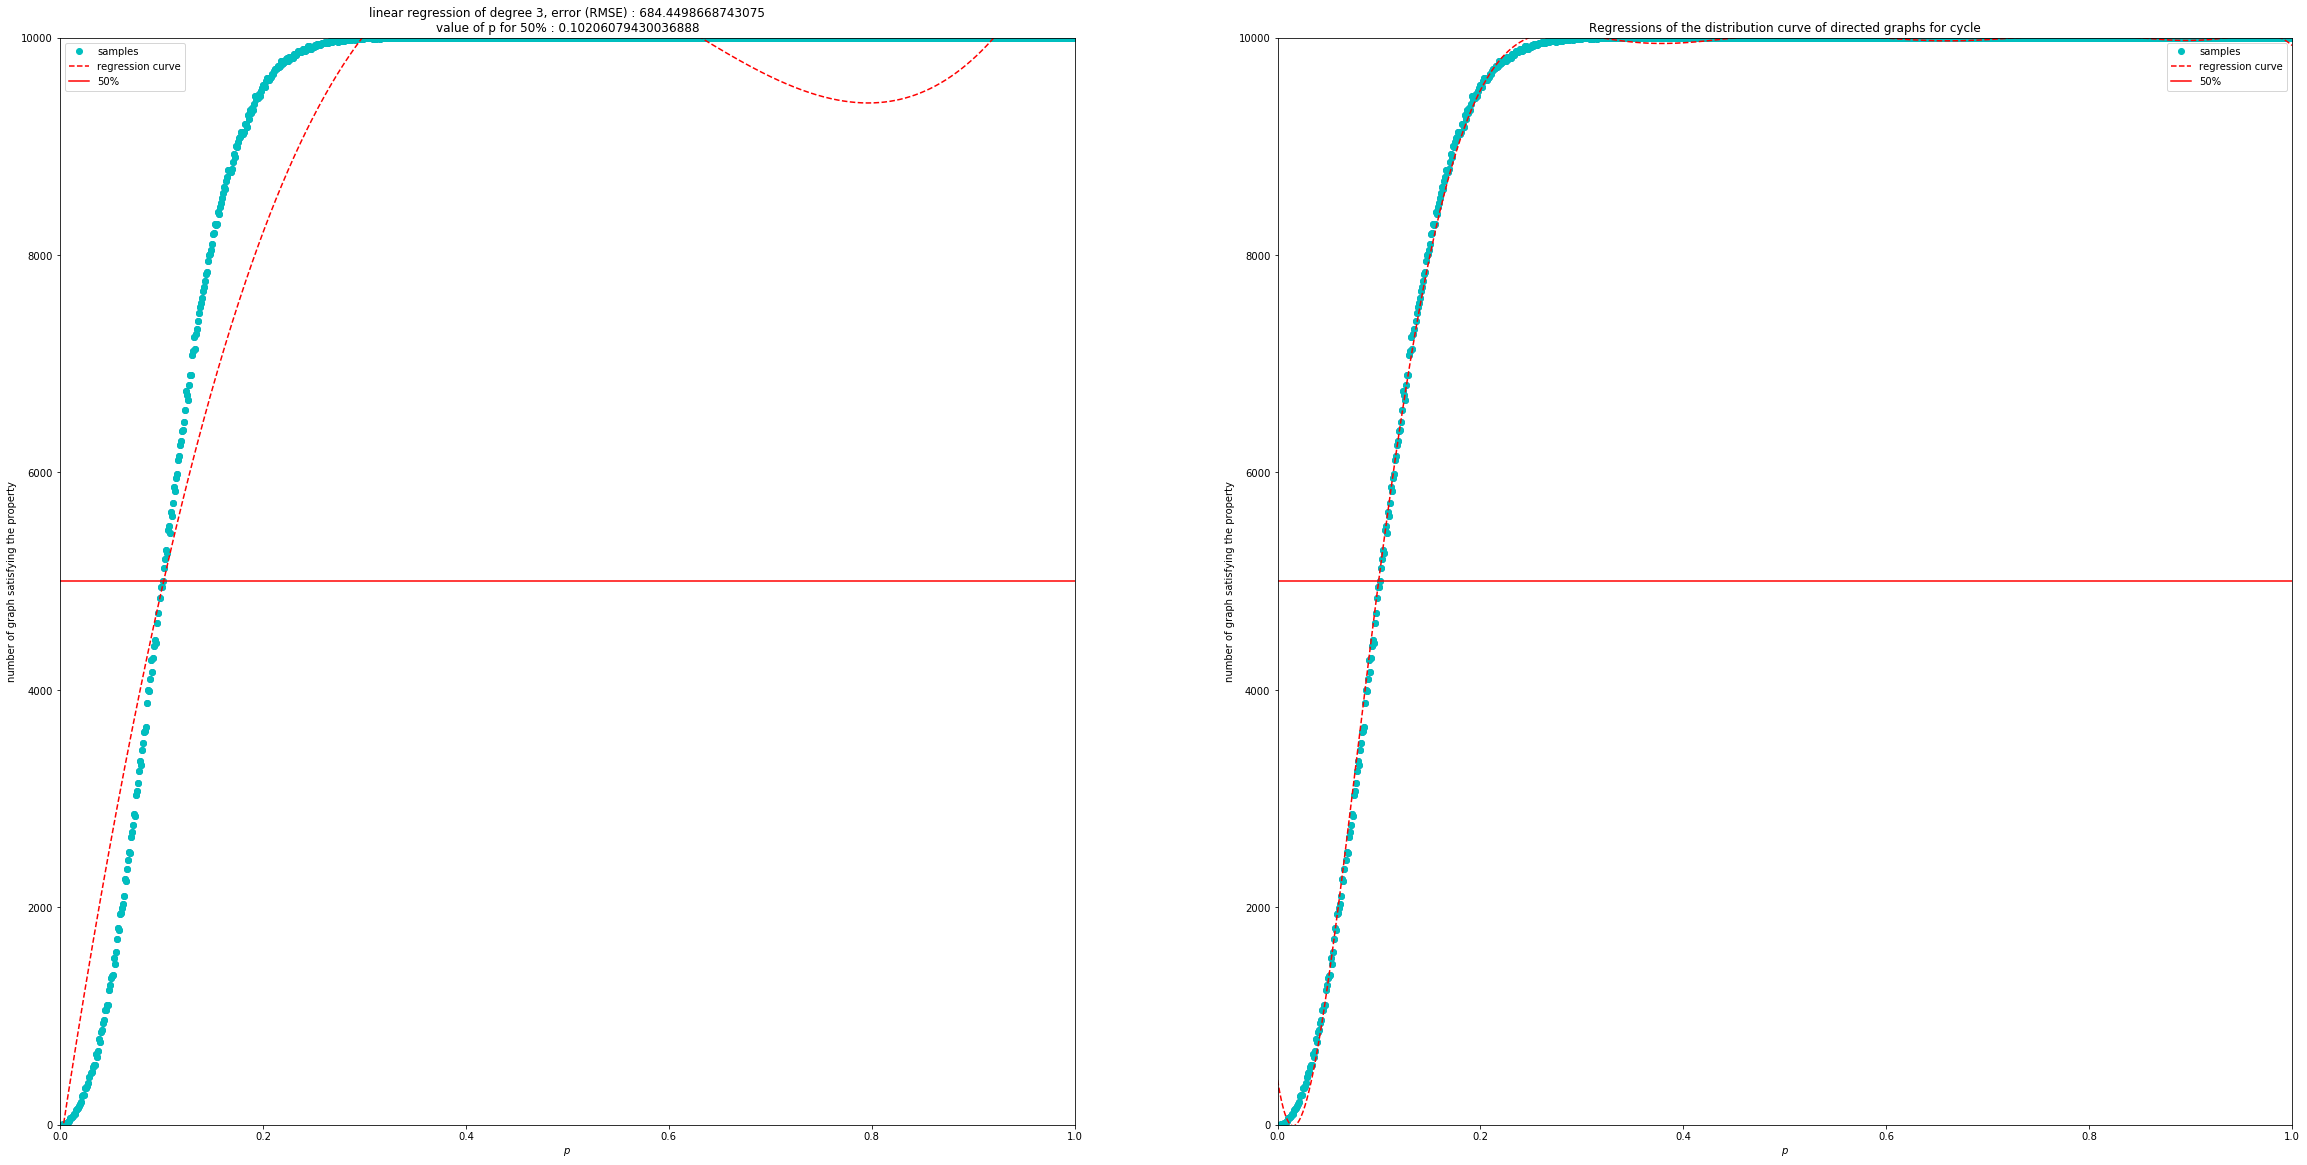

In [7]:
plot_regressions(df,'10',nb_samples,'Regressions of the distribution curve of directed graphs for cycle',
                 min_degree=3,
                 max_degree=10,
                 step_degree=7,
                 subplot=(1,2),
                 savefile="./poly_interpolation_order_10_cyclic_directed.pdf"
                )

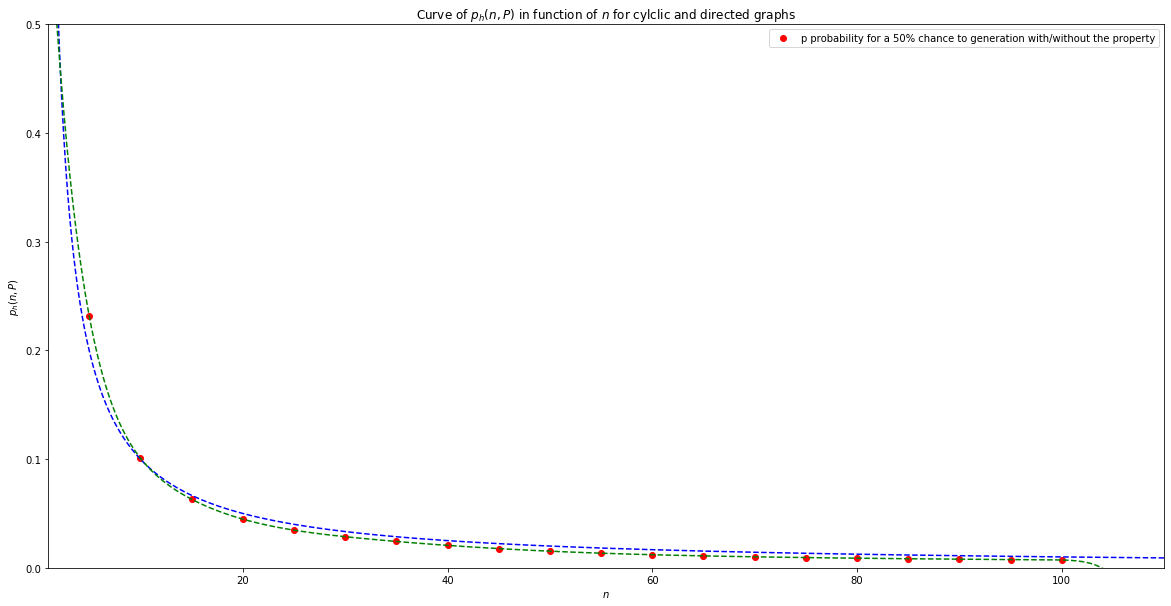

In [8]:
best_ps = compute_best_p(df,nb_samples,16)
x = np.array(list(map(lambda x : float(x[0]), list(best_ps.items()))))
y = np.array(list(map(lambda x : x[1][1][3],list(best_ps.items()))))

m = df.shape[0]
fit = np.polyfit(x,y,16)
fit_fn = np.poly1d(fit)
y_pred = fit_fn(x)
mse = np.sum((y_pred - y) ** 2)
rmse = np.sqrt(mse / m)

plt.figure(figsize=(20,10))
plt.xlim((1,110))
plt.ylim((0.0,0.5))

# plot regression points from sample
plt.plot(x,y,'ro')

# plot ln(x)/x
t = np.arange(1., 200., 0.1)
plt.plot(t,1.0 / t,'--b')

# plot regression curve
t = np.arange(1.,200.,0.1)
plt.plot(t,fit_fn(t),'--g')

plt.legend(['p probability for a 50% chance to generation with/without the property'])
plt.title('Curve of $p_h(n,P)$ in function of $n$ for cylclic and directed graphs')
plt.ylabel('$p_h(n,P)$')
plt.xlabel('$n$')
plt.savefig("./phnp_cyclic_directed.pdf",bbox_inches = 'tight')
plt.show()

In [9]:
print(type(fit_fn.coefficients))
print(fit_fn.coefficients)

acc = "List("
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + str(fit_fn.coefficients[itr]) + ","
acc = acc + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1])
acc = acc + ")"
print(acc)

acc = "poly = ["
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + '"' + str(fit_fn.coefficients[itr]) + '"' + ","
    if(itr % 4 == 3):
        acc = acc + "\n"
acc = acc + '"' + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1]) + '"'
acc = acc + "]"
print(acc)

<class 'numpy.ndarray'>
[-6.68046183e-28  5.67544285e-25 -2.19404679e-22  5.09821133e-20
 -7.91495284e-18  8.61546155e-16 -6.68594075e-14  3.65257425e-12
 -1.31340473e-10  2.29357636e-09  4.21883945e-08 -4.14950294e-06
  1.36428416e-04 -2.62821147e-03  3.14268585e-02 -2.23930287e-01
  8.21342695e-01]
List(-6.680461826388845e-28,5.675442849883727e-25,-2.194046785956094e-22,5.098211329844821e-20,-7.914952843981404e-18,8.615461546537247e-16,-6.685940752671416e-14,3.652574250417767e-12,-1.3134047319228813e-10,2.2935763613141834e-09,4.218839448302565e-08,-4.14950294404225e-06,0.0001364284161386201,-0.0026282114691727823,0.031426858543492656,-0.2239302870942157,0.8213426951590762)
poly = ["-6.680461826388845e-28","5.675442849883727e-25","-2.194046785956094e-22","5.098211329844821e-20",
"-7.914952843981404e-18","8.615461546537247e-16","-6.685940752671416e-14","3.652574250417767e-12",
"-1.3134047319228813e-10","2.2935763613141834e-09","4.218839448302565e-08","-4.14950294404225e-06",
"0.0001364